In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#Load csv data sources
zillow_zhvi_df = pd.read_csv("Resources/Zip_zhvi_uc_sfrcondo.csv")
census_data = pd.read_csv("Resources/census_data.csv")
zillow_zhvi_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,227153.0,...,1091641.0,1087154.0,1085121.0,1086397.0,1082450.0,1078831.0,1074640.0,1066881.0,1069011.0,1073214.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,212230.0,...,497724.0,499152.0,501262.0,504040.0,506695.0,509141.0,511452.0,513457.0,515542.0,516747.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,200946.0,...,998619.0,998643.0,1001866.0,1013305.0,1016169.0,1014689.0,1009092.0,1011561.0,1021442.0,1029770.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,201011.0,...,339450.0,340170.0,341602.0,343191.0,345709.0,348800.0,353185.0,357460.0,362468.0,367829.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,283626.0,...,635967.0,637199.0,638751.0,641622.0,644350.0,647291.0,650118.0,652578.0,655761.0,658233.0


In [3]:
#Keep columns we need for analysis
zillow_zhvi_latest_df = pd.DataFrame(zillow_zhvi_df[['RegionName','StateName','City','Metro','CountyName','2021-03-31']])
zillow_zhvi_latest_df = zillow_zhvi_latest_df.rename(columns={"2021-03-31":"HomeValue"})
#Grab the latest month data
zillow_zhvi_latest_df.head()


,RegionName,StateName,City,Metro,CountyName,HomeValue
0,10025,NY,New York,New York-Newark-Jersey City,New York County,1073214.0
1,60657,IL,Chicago,Chicago-Naperville-Elgin,Cook County,516747.0
2,10023,NY,New York,New York-Newark-Jersey City,New York County,1029770.0
3,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,367829.0
4,60614,IL,Chicago,Chicago-Naperville-Elgin,Cook County,658233.0


In [4]:
#Merge Zillow home value index data with census data
zc_combined = pd.merge(zillow_zhvi_latest_df, census_data, left_on='RegionName', right_on='Zipcode', how="inner")
zc_combined = zc_combined.drop(['Zipcode'], axis=1)
zc_combined.head()

,RegionName,StateName,City,Metro,CountyName,HomeValue,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,10025,NY,New York,New York-Newark-Jersey City,New York County,1073214.0,92251.0,41.4,91624.0,76275.0,12540.0,13.593349
1,60657,IL,Chicago,Chicago-Naperville-Elgin,Cook County,516747.0,70958.0,31.2,95173.0,76546.0,5294.0,7.460751
2,10023,NY,New York,New York-Newark-Jersey City,New York County,1029770.0,62541.0,43.3,132605.0,126937.0,4853.0,7.759710
3,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,367829.0,118291.0,35.2,135943.0,50557.0,4944.0,4.179523
4,60614,IL,Chicago,Chicago-Naperville-Elgin,Cook County,658233.0,71954.0,30.5,117138.0,88058.0,5614.0,7.802207


In [5]:
zc_combined=zc_combined.loc[zc_combined["Household Income"]!=-666666666]

In [6]:
zillow_zhvi_metro_df = zc_combined.loc[zc_combined["Metro"].isna() == False]
zillow_zhvi_suburb_df = zc_combined.loc[zc_combined["Metro"].isna() == True]
#zc_combined_metro = pd.merge(zillow_zhvi_metro_df, census_data, left_on='RegionName', right_on='Zipcode', how="inner")
#zc_combined_suburb = pd.merge(zillow_zhvi_suburb_df, census_data, left_on='RegionName', right_on='Zipcode', how="inner")
#zc_combined_suburb.describe(include='all')

In [7]:
zillow_zhvi_metro_df.to_csv("Output/zillow_census_metro.csv", index=False, header=True)
zillow_zhvi_suburb_df.to_csv("Output/zillow_census_suburb.csv", index=False, header=True)

In [8]:
#remove columns that are not useful
zillow_zhvi_df = zillow_zhvi_df.drop(['StateName','RegionType','RegionID','SizeRank'], axis=1)
zillow_zhvi_df.head()

,RegionName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31
0,10025,NY,New York,New York-Newark-Jersey City,New York County,227153.0,225738.0,225814.0,225790.0,226306.0,...,1091641.0,1087154.0,1085121.0,1086397.0,1082450.0,1078831.0,1074640.0,1066881.0,1069011.0,1073214.0
1,60657,IL,Chicago,Chicago-Naperville-Elgin,Cook County,212230.0,212073.0,211661.0,211524.0,210956.0,...,497724.0,499152.0,501262.0,504040.0,506695.0,509141.0,511452.0,513457.0,515542.0,516747.0
2,10023,NY,New York,New York-Newark-Jersey City,New York County,200946.0,200989.0,201100.0,201816.0,202857.0,...,998619.0,998643.0,1001866.0,1013305.0,1016169.0,1014689.0,1009092.0,1011561.0,1021442.0,1029770.0
3,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,201011.0,201259.0,201062.0,199869.0,198728.0,...,339450.0,340170.0,341602.0,343191.0,345709.0,348800.0,353185.0,357460.0,362468.0,367829.0
4,60614,IL,Chicago,Chicago-Naperville-Elgin,Cook County,283626.0,283367.0,282845.0,282702.0,282021.0,...,635967.0,637199.0,638751.0,641622.0,644350.0,647291.0,650118.0,652578.0,655761.0,658233.0


In [9]:
#Transpose the columns of dates to rows
zillow_zhvi_his_df = zillow_zhvi_df.melt(id_vars = ['RegionName', 'State','City','Metro','CountyName'], var_name = 'Date', value_name = 'Value').sort_values('RegionName')
zillow_zhvi_his_df = zillow_zhvi_his_df[['State','Metro','CountyName','City','RegionName','Date','Value']]
zillow_zhvi_his_df = zillow_zhvi_his_df.sort_values(by=['State','Metro','CountyName','City','RegionName','Date'])
# seperate the data by if they have metro value or not
zillow_zhvi_his_metro_df = zillow_zhvi_his_df.loc[zillow_zhvi_his_df["Metro"].isna() == False]
zillow_zhvi_his_suburb_df = zillow_zhvi_his_df.loc[zillow_zhvi_his_df["Metro"].isna() == True]
zillow_zhvi_his_df.head()

,State,Metro,CountyName,City,RegionName,Date,Value
6125,AK,Anchorage,Anchorage Borough,Anchorage,99501,1996-01-31,117115.0
36422,AK,Anchorage,Anchorage Borough,Anchorage,99501,1996-02-29,117157.0
66719,AK,Anchorage,Anchorage Borough,Anchorage,99501,1996-03-31,117241.0
97016,AK,Anchorage,Anchorage Borough,Anchorage,99501,1996-04-30,117308.0
127313,AK,Anchorage,Anchorage Borough,Anchorage,99501,1996-05-31,117322.0


In [10]:
zillow_zhvi_his_metro_df.to_csv("Output/zillow_his_metro.csv", index=False, header=True)
zillow_zhvi_his_suburb_df.to_csv("Output/zillow_his_suburb.csv", index=False, header=True)

In [11]:
zillow_zhvi_his_df.head()

,State,Metro,CountyName,City,RegionName,Date,Value
6125,AK,Anchorage,Anchorage Borough,Anchorage,99501,1996-01-31,117115.0
36422,AK,Anchorage,Anchorage Borough,Anchorage,99501,1996-02-29,117157.0
66719,AK,Anchorage,Anchorage Borough,Anchorage,99501,1996-03-31,117241.0
97016,AK,Anchorage,Anchorage Borough,Anchorage,99501,1996-04-30,117308.0
127313,AK,Anchorage,Anchorage Borough,Anchorage,99501,1996-05-31,117322.0


In [12]:
# DB scatter plot for entire US Population 

zc_combined.head()

,RegionName,StateName,City,Metro,CountyName,HomeValue,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,10025,NY,New York,New York-Newark-Jersey City,New York County,1073214.0,92251.0,41.4,91624.0,76275.0,12540.0,13.593349
1,60657,IL,Chicago,Chicago-Naperville-Elgin,Cook County,516747.0,70958.0,31.2,95173.0,76546.0,5294.0,7.460751
2,10023,NY,New York,New York-Newark-Jersey City,New York County,1029770.0,62541.0,43.3,132605.0,126937.0,4853.0,7.759710
3,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,367829.0,118291.0,35.2,135943.0,50557.0,4944.0,4.179523
4,60614,IL,Chicago,Chicago-Naperville-Elgin,Cook County,658233.0,71954.0,30.5,117138.0,88058.0,5614.0,7.802207


In [15]:
#DB for Metro Scatter plot
suburb_df = pd.read_csv("Output/zillow_census_suburb.csv")
suburb_df.head()

,RegionName,StateName,City,Metro,CountyName,HomeValue,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,28734,NC,Franklin,NaN,Macon County,196287.0,27887.0,48.4,43254.0,24357.0,4439.0,15.917811
1,77351,TX,West Livingston,NaN,Polk County,142484.0,34366.0,43.7,50318.0,24865.0,5496.0,15.992551
2,39452,MS,Lucedale,NaN,George County,139322.0,27517.0,36.9,50714.0,24305.0,4542.0,16.506160
3,38583,TN,Sparta,NaN,White County,147829.0,24459.0,42.6,43209.0,21703.0,3503.0,14.321926
4,30533,GA,Dahlonega,NaN,Lumpkin County,229764.0,27113.0,37.4,52280.0,27568.0,3886.0,14.332608


In [17]:
suburb_scatter = suburb_df[['HomeValue', 'Population']]
suburb_scatter.head()

,HomeValue,Population
0,196287.0,27887.0
1,142484.0,34366.0
2,139322.0,27517.0
3,147829.0,24459.0
4,229764.0,27113.0


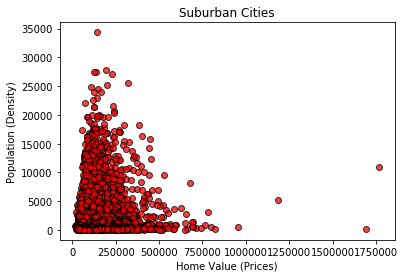

In [18]:
x_limit = 125000
y_limit = 1000000
x_axis = suburb_scatter['HomeValue']
y_axis = suburb_scatter['Population']
plt.scatter(x_axis, y_axis, marker='o', facecolors="red", edgecolor="black", alpha=0.75)
plt.xlabel('Home Value (Prices)')
plt.ylabel('Population (Density)')
plt.title('Suburban Cities')
plt.show()

In [19]:
#DB for Metro Scatter plot
metro_df = pd.read_csv("Output/zillow_census_metro.csv")
metro_df.head()


,RegionName,StateName,City,Metro,CountyName,HomeValue,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,10025,NY,New York,New York-Newark-Jersey City,New York County,1073214.0,92251.0,41.4,91624.0,76275.0,12540.0,13.593349
1,60657,IL,Chicago,Chicago-Naperville-Elgin,Cook County,516747.0,70958.0,31.2,95173.0,76546.0,5294.0,7.460751
2,10023,NY,New York,New York-Newark-Jersey City,New York County,1029770.0,62541.0,43.3,132605.0,126937.0,4853.0,7.759710
3,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,367829.0,118291.0,35.2,135943.0,50557.0,4944.0,4.179523
4,60614,IL,Chicago,Chicago-Naperville-Elgin,Cook County,658233.0,71954.0,30.5,117138.0,88058.0,5614.0,7.802207


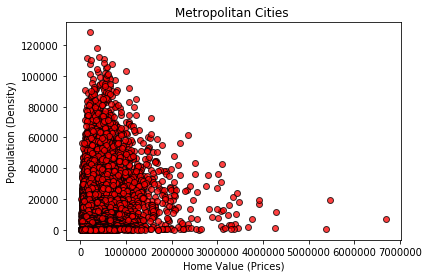

In [20]:
x_limit = 125000
y_limit = 1000000
x_axis = metro_df['HomeValue']
y_axis = metro_df['Population']
plt.scatter(x_axis, y_axis, marker='o', facecolors="red", edgecolor="black", alpha=0.75)
plt.xlabel('Home Value (Prices)')
plt.ylabel('Population (Density)')
plt.title('Metropolitan Cities ')
plt.show()